### **MONTREUIL Leïna 21101713**

Afin de rendre la lecture plus fluide, la première partie présente la visualisation des données, le prétraitement appliqué et le modèle final choisi.
La seconde partie vous montre les autres modèles que j'ai tenté d'évaluer

## Data challenge - gaz toxiques

lien vers le data challenge : https://challengedata.ens.fr/participants/challenges/156

### Chargement des données et import des bibliothèques

In [ ]:
#!pip install ydata_profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport


In [2]:
x_train = pd.read_csv("x_train_T9QMMVq(1).csv")
y_train = pd.read_csv("y_train_R0MqWmu(1).csv")
x_test = pd.read_csv("x_test_9F13O5s(1).csv")

In [ ]:
# vérification
print(x_train.index[:20])
print(y_train.index[:20])
print(x_train.index.equals(y_train.index))


RangeIndex(start=0, stop=20, step=1)
RangeIndex(start=0, stop=20, step=1)
True


## Présentation des données

Description du jeu de donné x_train :
* 8 colonnes nommées M4-M7 et M12-M15. Il s’agit de mesures faisant partie de deux groupes de capteurs qui sont physiquement proches les uns des autres (par exemple, le capteur M5 se trouve entre M4 et M6).
* 4 colonnes nommées S1-S3 et R. Il s’agit des mesures de quatre capteurs complémentaires.
* Humidity est l’humidité absolue (en unités arbitraires), car l’eau a un impact sur les mesures.
* on veut produire des probabilité (ou le niveau de confiance) que cet échantillon appartienne à telle ou telle famille de gaz (ou caractéristique du gaz)

Le fichier de sortie d’entraînement contient l’ID correspondant à un échantillon d’entrée, suivi du niveau d’alarme pour chacune des 23 classes à détecter
* ID : identifiant de l'échantillon dans x_train, x_test
* on veut produire des probabilité (ou le niveau de confiance) que cet échantillon appartienne à telle ou telle famille de gaz (ou caractéristique du gaz)

In [ ]:
y_train.head()

# on a les réponses pour les x_train

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,1,0.000000,0.0,0.176471,0.176471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.176471,0.0,0.0,0.176471,0.000000
2,2,0.128465,0.0,0.128465,0.128465,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128465,0.000000,0.0,0.0,0.128465,0.000000
3,3,0.000000,0.0,0.263736,0.263736,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.263736,0.263736
4,4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
x_train.head()

,ID,Humidity,M12,M13,M14,M15,M4,M5,M6,M7,R,S1,S2,S3
0,0,0.098160,-0.175981,-0.086469,-0.041465,-0.021153,0.197597,0.054646,-0.009277,0.001855,1.007242,1.013007,1.000563,0.999397
1,1,0.000307,-0.066416,0.036071,0.032636,-0.000573,2.568494,1.883142,0.779251,0.262231,0.971428,0.996735,1.002226,1.013063
2,2,0.000388,0.190943,0.187540,0.143680,0.092635,-0.147460,-0.021174,0.040079,0.065790,1.302238,0.905275,0.953600,0.986347
3,3,0.761003,-0.151393,-0.083723,-0.048982,-0.018259,0.045380,0.102427,0.012915,0.004453,1.013741,1.004315,1.012301,1.009465
4,4,0.107808,0.074818,0.042692,0.026169,0.019134,-0.056284,-0.011193,0.010233,0.012205,0.998659,1.005154,1.000096,0.999553


In [ ]:
# aucune valeurs manquantes
#x_train.isna().sum(), y_train.isna().sum(), x_test.isna().sum()

In [ ]:
# resumé des valeurs pour y_train, x_train, x_test

#print("\nRésumé y_train:")
#print(y_train.describe())

#print("\nRésumé x_train:")
#print(x_train.describe())

#print("\nRésumé x_test:")
#print(x_test.describe())

In [ ]:
# rapport sur x_train, y_train, x_test

report_x_train = ProfileReport(x_train, title="Profil des entrées (X_train)", explorative=True)
report_y_train = ProfileReport(y_train, title="Profil des sorties (Y_train)", explorative=True)
report_x_test = ProfileReport(x_test, title="Profil des entrées (X_test)", explorative=True)

report_x_train.to_file("profil_x_train.html")
report_y_train.to_file("profil_y_train.html")
report_x_test.to_file("profil_x_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00, 10.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:03<00:00,  7.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00, 13.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

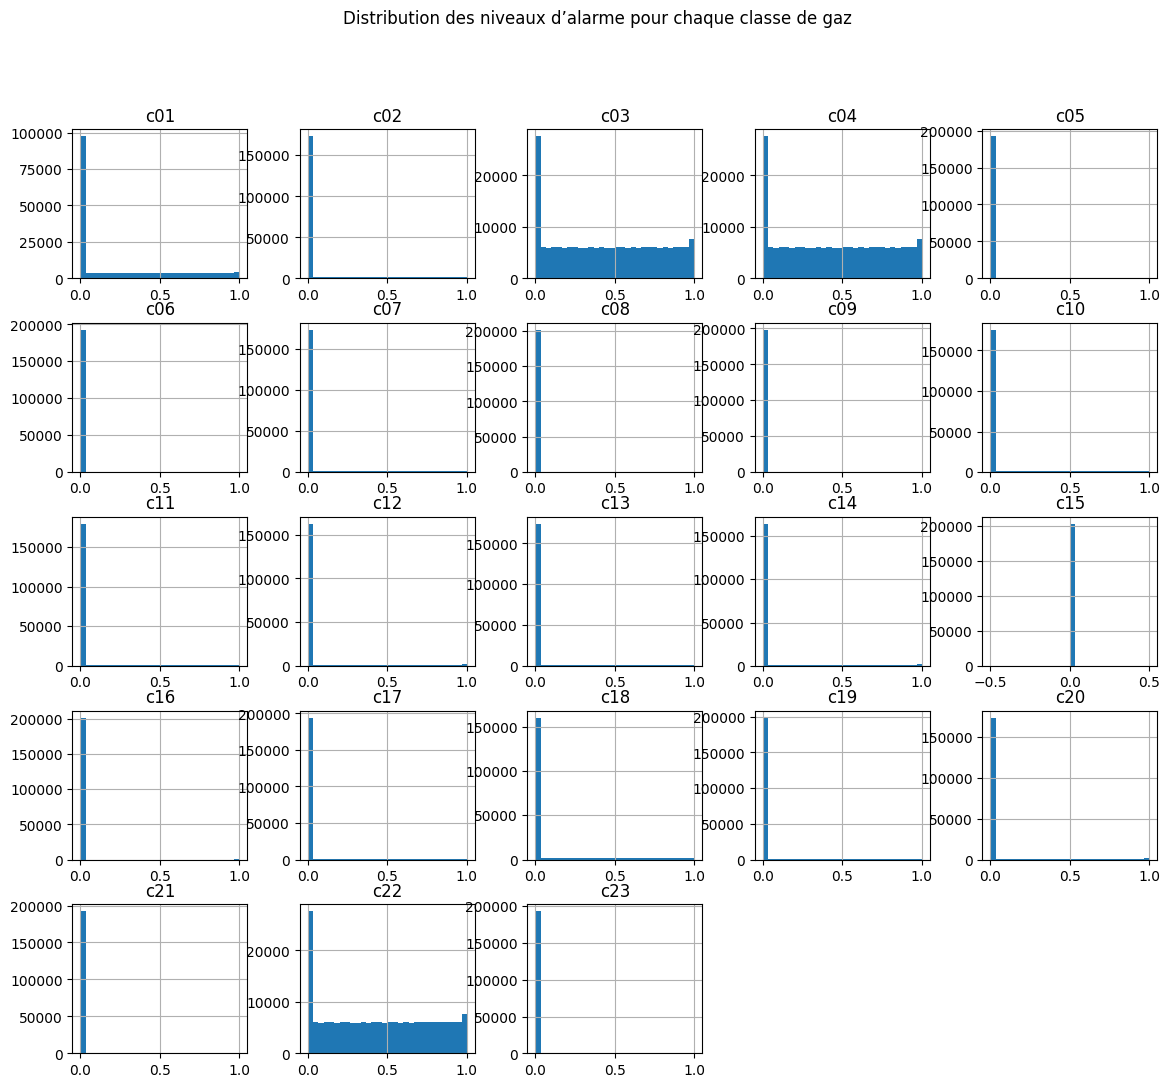

In [ ]:
# Visualisation des niveau d'alarme pour y_train

y = y_train.iloc[:,1:]  # enlever la colonne ID

y.hist(figsize=(14,12), bins=30)
plt.suptitle("Distribution des niveaux d’alarme pour chaque classe de gaz")
plt.show()

*Remarques* : La plupart des niveaux d'alarmes sur le jeu d'entrainement sont souvent nuls (pics à 0) mais quelques alarmes sont pas toujours nuls => déséquilibre fort entre classes.

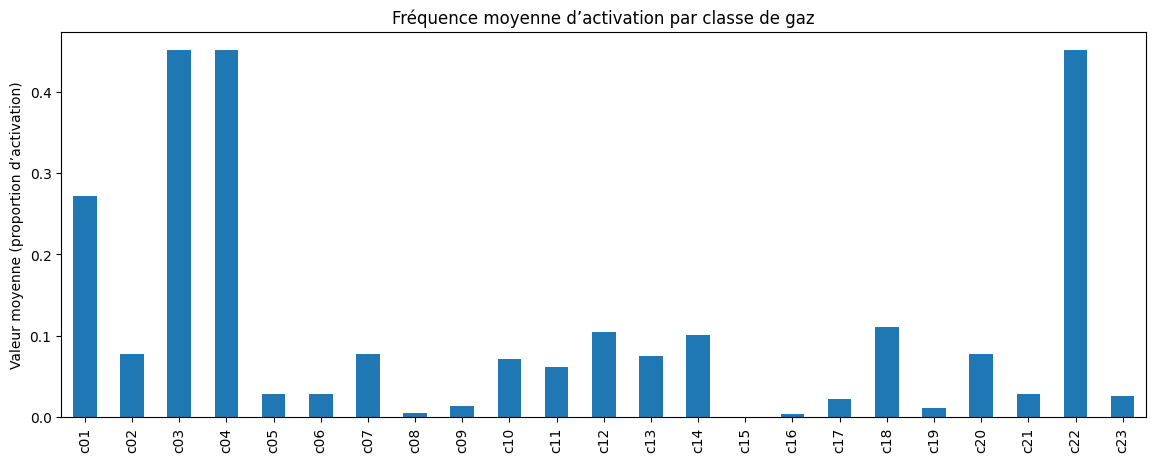

In [ ]:
# Barplot des moyennes par classe (fréquence d’activation)
plt.figure(figsize=(14,5))
y.mean().plot(kind="bar")
plt.ylabel("Valeur moyenne (proportion d’activation)")
plt.title("Fréquence moyenne d’activation par classe de gaz")
plt.show()

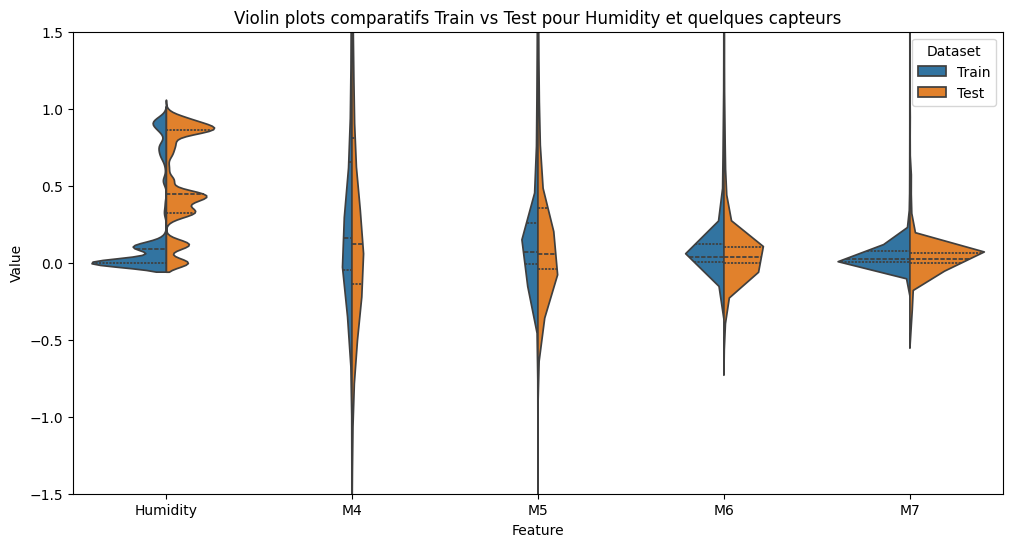

In [ ]:
# violin plots comparatifs entre x_train et x_test
import seaborn as sns

features = ["Humidity", "M4", "M5", "M6", "M7"]

df_train = x_train[features].copy()
df_train["Dataset"] = "Train"

df_test = x_test[features].copy()
df_test["Dataset"] = "Test"

df_long = pd.concat([df_train, df_test], axis=0)
df_long = df_long.melt(id_vars="Dataset", var_name="Feature", value_name="Value")


plt.figure(figsize=(12,6))
sns.violinplot(x="Feature", y="Value", hue="Dataset", data=df_long, split=True, inner="quartile")
plt.ylim(-1.5, 1.5)
plt.title("Violin plots comparatifs Train vs Test pour Humidity et quelques capteurs")
plt.show()

*Remarque* : Ce plot compare les features sur x_train vs x_test. On remarque que pour la feature Humidity, il y a un décalage entre le jeu d'entrainement et le jeu de teste => voir si hymidty ne rend pas le travail trop compliqué pour généraliser étant donné qu'on apprend humidity sur train qui finalement sur le test n'a rien à voir pratiquement.
De plus, le profilage nous confirme cela, les données statistiques, les affichages de humidity sur x_train et x_test sont très diférents
Solutions possibles
  * supprimer Humidity
  * modifier Humidty train pour le décaler (data augmentation ou normalisation spéciale)

In [ ]:
# corrélation entre hyumidty et toutes les autres

features = ["Humidity","M12", "M13", "M14", "M15", "M4", "M5", "M6", "M7", "R", "S1", "S2", "S3"]

df_train = x_train[features].copy()
df_train["Dataset"] = "Train"

df_train.drop(columns=["Dataset"]).corr()['Humidity'].sort_values(ascending=False)


,Humidity
Humidity,1.000000
S3,0.102002
M13,0.037870
M14,0.036680
M12,0.036553
M15,0.024513
S1,0.007020
M5,0.002331
S2,-0.005366
M4,-0.015373


*Remarque* : à priori, Humidity n'est pas lié linéairement aux autres variables. Peut être qu'elle n'apport pas d'information particulière

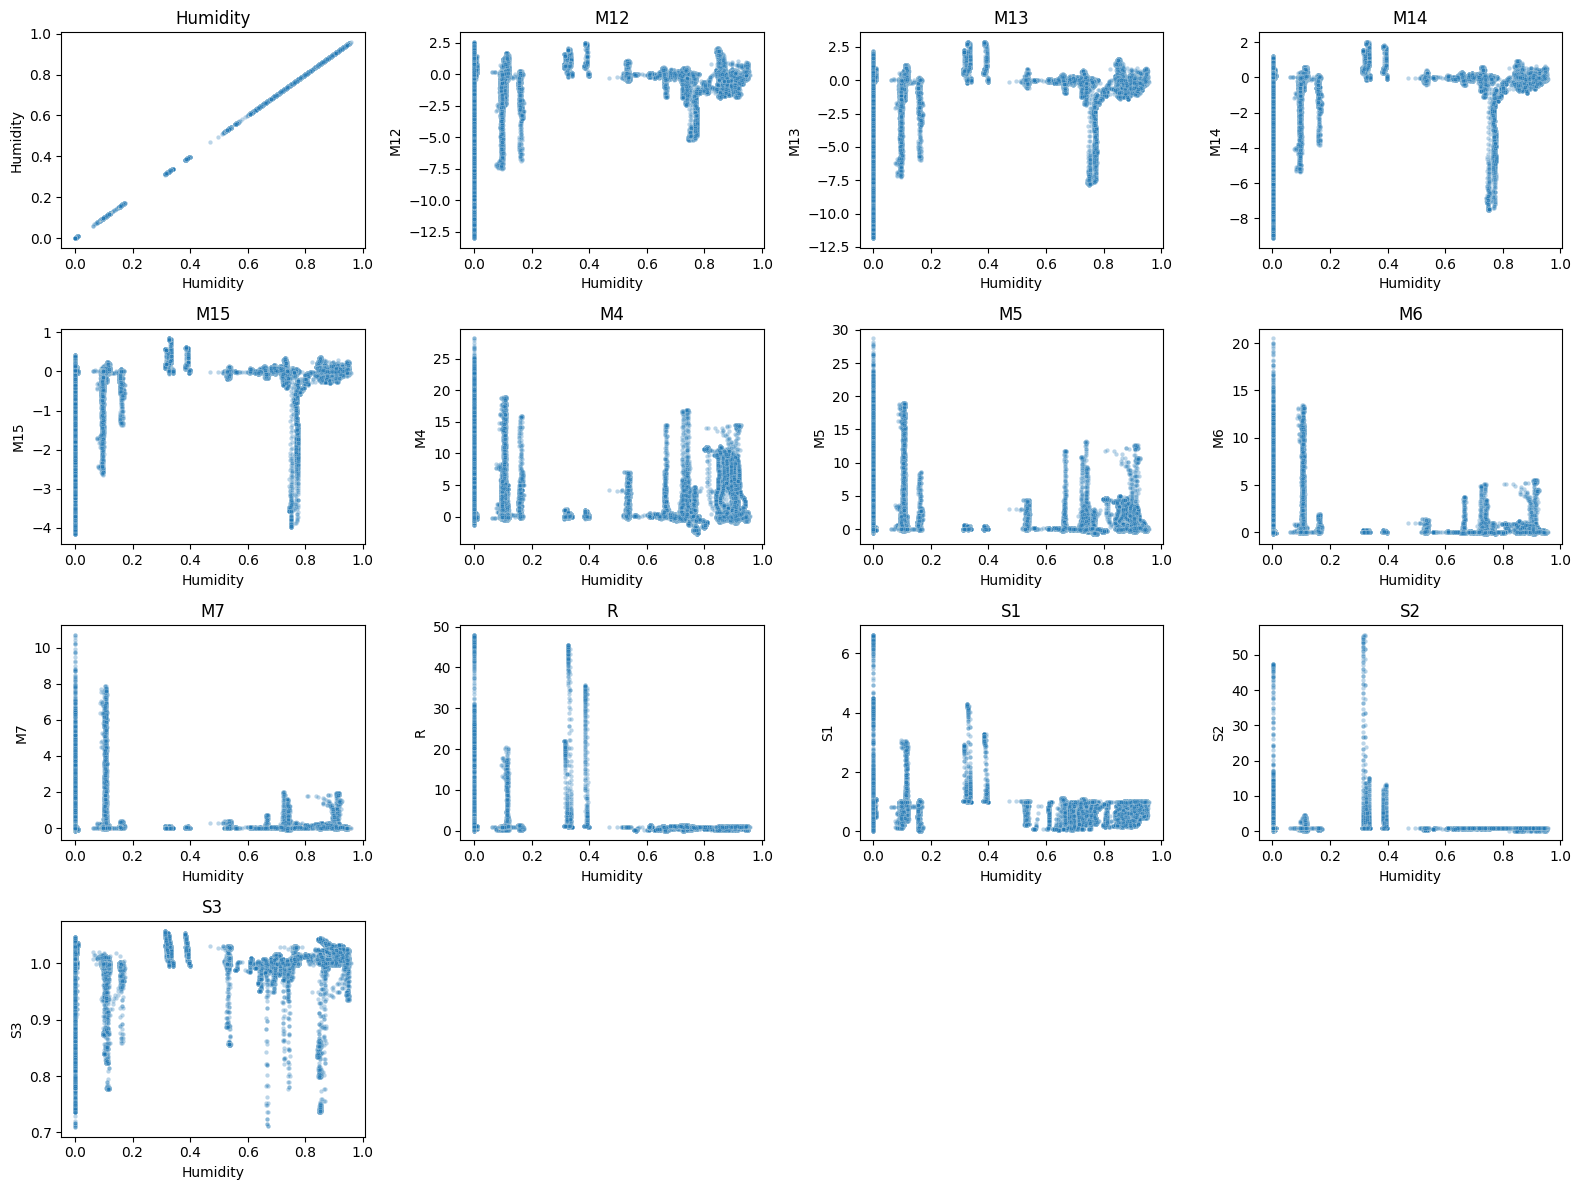

In [ ]:
# on vérifie si de manière graphique, on observe des liens peut être non linéaires

n_cols = 4
n_rows = -(-len(features) // n_cols)  # division plafond

plt.figure(figsize=(4 * n_cols, 3 * n_rows))

for i, f in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x='Humidity', y=f, data=df_train, alpha=0.3, s=10)
    plt.title(f)
    plt.xlabel('Humidity')
    plt.ylabel(f)
    plt.tight_layout()

plt.show()


*Remarque* : à priori pas de relations particulières entre humidity et les autres

## Preprocessing des données

In [3]:
# on produit un jeu de validation pour évaluer notre métrique la dessus
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Séparer ID et features (on s'en fiche des ID pour la régression)
train_ID = x_train["ID"]
test_ID = x_test["ID"]

X = x_train.drop(columns=["ID"])
Y = y_train.drop(columns=["ID"])
X_test_original = x_test.drop(columns=["ID"]) # Keep original X_test for later if needed

X_train, X_val, Y_train, Y_val = train_test_split(x_train.drop(columns=["ID", "Humidity"]), y_train.drop(columns=["ID"]), test_size=0.2, random_state=42)

# Créer le scaler
scaler = StandardScaler()

# Fit sur le train uniquement
X_train = scaler.fit_transform(X_train)

# Transform sur val et test with the stats from the train
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test_original.drop(columns=["Humidity"])) # Remove Humidity from X_test before transforming

# 20% jeu de validation
# 80% jeu d'entrainement

In [4]:
# on définit le score qui nous permet d'évaluer des modèles

# ci_hat -> "vraies" valeurs

def score(y_true, y_pred):
    """
    Implémente
    """
    # si y_true >0.5 on met fi = 1.2 et sinon on met fi = 1
    fi = np.where(y_true.values >= 0.5, 1.2, 1.0)

    # (c_i - \hat{c}_i)^2
    sq_error = (y_true.values - y_pred) ** 2

    # erreur pondérée moyenne par sample
    err = np.mean(fi * sq_error, axis=1)

    # moyenne sur tous les samples + sqrt final
    return np.sqrt(np.mean(err))

## Modèle gardé

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
print(X_train.shape)

# on a 12 features , ce sont ces caractéristiques qu'on entre dans
# le MLP
# en sortie on veut y_pred = (c0,c1,...,c22) -> 23 labels

(162346, 12)


In [45]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim = 12, hidden_dims = [128, 64, 32], output_dim = 23):
        super(RegressionModel, self).__init__()
        # tester hidden_dims = [256, 128, 64]
        # avant = [128,64,32]

        self.fc1 = nn.Linear(input_dim,hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], output_dim)

        # ajout normalisation
      #  self.bn1 = nn.LayerNorm(hidden_dims[0])
       # self.bn2 = nn.LayerNorm(hidden_dims[1])
        #self.bn3 = nn.LayerNorm(hidden_dims[2])
      #  self.bn1 = nn.BatchNorm1d(hidden_dims[0])
       # self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        #self.bn3 = nn.BatchNorm1d(hidden_dims[2])


        self.dropout = nn.Dropout(0.2)
        #self.act = nn.LeakyReLU(0.01)


    def forward(self, x):
      # ensuite essayer F.gelu torch.nn.functional.gelu -> pas ouf
        x = self.dropout(self.bn1(F.relu(self.fc1(x))))
        x = self.dropout(self.bn2(F.relu(self.fc2(x))))
        x = self.dropout(self.bn3(F.relu(self.fc3(x))))


        return self.fc4(x)

In [35]:
# nbre de paramètres du modèle :
# taille du jeu de données :

In [36]:
class LossCustom(nn.Module):
    def __init__(self):
        super(LossCustom, self).__init__()

    def forward(self, y_pred, y_true):
        # si y_true >0.5 on met fi = 1.2 et sinon on met fi = 1
        #fi = np.where(y_true.values >= 0.5, 1.2, 1.0)

        fi = torch.where(y_true >= 0.5,
                              torch.tensor(1.2, device=y_true.device),
                              torch.tensor(1.0, device=y_true.device))

        # (c_i - \hat{c}_i)^2
        sq_error = (y_true - y_pred) ** 2

        # erreur pondérée moyenne par sample
        err = torch.mean(fi * sq_error, axis=1)

        # moyenne sur tous les samples + sqrt final
        return torch.sqrt(torch.mean(err))


In [37]:
#X_test

In [38]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset


In [47]:
model = RegressionModel()
criterion = LossCustom()  # on prend pour l'entrainement notre "MSE"
#optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.Adam(model.parameters(), lr=2e-3, weight_decay=1e-4)
# meilleure resultat avec ce lr et weight decay
#optimizer = torch.optim.Adam(model.parameters(), lr=2e-2, weight_decay=1e-4)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3, weight_decay=1e-4)
#optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)

# a tester : batch_size = 512 # lr = 2e-3

if model and criterion and optimizer:
    print("Model Architecture:")
    print(model)
    print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")
    print(f"\nLoss function: {criterion}")
    print(f"Optimizer: {optimizer.__class__.__name__}")

X_tensor     = torch.tensor(X_train, dtype=torch.float32)
Y_tensor     = torch.tensor(Y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32)


# Creation dataloader et dataset
train_dataset = TensorDataset(X_tensor, Y_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=True)
#train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
#val_loader   = DataLoader(val_dataset, batch_size=256, shuffle=False)

# on met sur gpu si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Model Architecture:
RegressionModel(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=23, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.12, inplace=False)
)

Total parameters: 13207

Loss function: LossCustom()
Optimizer: Adam


RegressionModel(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=23, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.12, inplace=False)
)

Pour mon entrainement j'ai 162 346 exemples et 12 features. J'utilise un MLP qui optimise 13 207 paramètres.

In [40]:
torch.manual_seed(42)
np.random.seed(42)


Epoch [1/250] Train Loss: 0.1416 | Val Loss: 0.0871
Epoch [2/250] Train Loss: 0.0923 | Val Loss: 0.0701
Epoch [3/250] Train Loss: 0.0841 | Val Loss: 0.0615
Epoch [4/250] Train Loss: 0.0791 | Val Loss: 0.0608
Epoch [5/250] Train Loss: 0.0762 | Val Loss: 0.0560
Epoch [6/250] Train Loss: 0.0744 | Val Loss: 0.0529
Epoch [7/250] Train Loss: 0.0726 | Val Loss: 0.0537
Epoch [8/250] Train Loss: 0.0715 | Val Loss: 0.0517
Epoch [9/250] Train Loss: 0.0710 | Val Loss: 0.0507
Epoch [10/250] Train Loss: 0.0702 | Val Loss: 0.0551
Epoch [11/250] Train Loss: 0.0696 | Val Loss: 0.0537
Epoch [12/250] Train Loss: 0.0693 | Val Loss: 0.0490
Epoch [13/250] Train Loss: 0.0688 | Val Loss: 0.0480
Epoch [14/250] Train Loss: 0.0679 | Val Loss: 0.0474
Epoch [15/250] Train Loss: 0.0676 | Val Loss: 0.0460
Epoch [16/250] Train Loss: 0.0681 | Val Loss: 0.0500
Epoch [17/250] Train Loss: 0.0673 | Val Loss: 0.0487
Epoch [18/250] Train Loss: 0.0673 | Val Loss: 0.0483
Epoch [19/250] Train Loss: 0.0670 | Val Loss: 0.0487
Ep

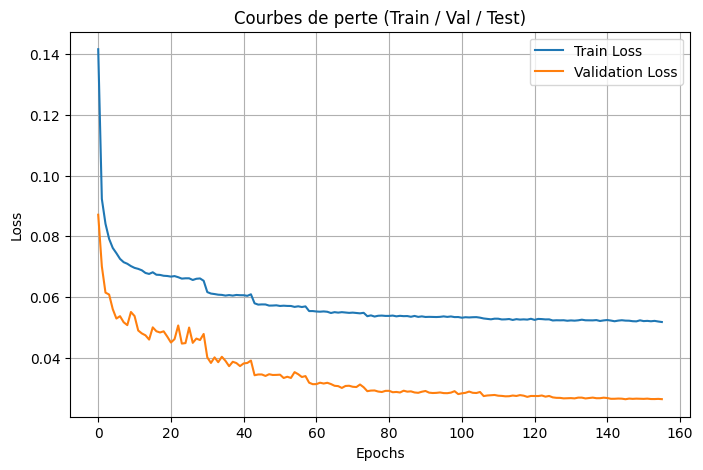

In [41]:
import torch
import torch.nn as nn

# -paramètre pour le modele (avec early stopping)
n_epochs = 250
patience = 10          # nb d'époques sans amélioration avant arrêt pour early
best_val_loss = float("inf")
counter = 0
train_losses, val_losses= [], []

# boucle d'entrainement
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_Y in train_loader:
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)

        # froward pass
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_Y)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        running_loss += loss.item()

    # moyenne sur train
    train_loss = running_loss / len(train_loader)

    # mode evaluation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_Y in val_loader:
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
            y_pred = model(batch_X)
            val_loss += criterion(y_pred, batch_Y).item()
    val_loss /= len(val_loader)
    scheduler.step(val_loss)

    # stockage pour graphiques
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{n_epochs}] "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"\n early stopping at epoch {epoch+1}")
            break

# recharger meilleure modele
model.load_state_dict(torch.load("best_model.pt"))

# courbes pour les pertes (faire aussi avec summary writer)
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbes de perte (Train / Val / Test)")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# Evalutatio

model.eval()
with torch.no_grad():
    # Validation
    y_val_pred = model(torch.tensor(X_val, dtype=torch.float32).to(device))
    val_score = score(Y_val, y_val_pred.cpu().numpy())

    # Test
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_pred = model(X_test_tensor).cpu().numpy()

    print("Validation Score:", val_score)

Validation Score: 0.02653055613022045


In [43]:

# avec lr = 2e⁻3  0.07862643844389137
# avec lr = 2e-3 + scheduler  0.07498061977807358
# scheduler + batchnorm : 0.08819851266783438
# 0.0955262035220317
# 0.07897700615092608

In [44]:
# Génération du fichier de soumission
cols = [f"c{i}" for i in range(1, 24)]
submission = pd.DataFrame(y_test_pred, columns=cols)
submission.insert(0, "ID", test_ID)

submission.to_csv("submission_MLP11_model0911_layernorm.csv", index=False)



---



# Autres Modèles testés

### MLP avec d'autres couches , d'autres fonction d'activation, ...

In [ ]:
class RegressionModel2(nn.Module):
    def __init__(self, input_dim = 12, hidden_dims = [128,64,32], output_dim = 23):
        super(RegressionModel2, self).__init__()
# teste en ajoutant batchNorm + relu
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], output_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))

        return self.fc4(x)

In [ ]:
model2 = RegressionModel2()
criterion = LossCustom()  # on prend pour l'entrainement notre "MSE"
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model2.parameters(), lr=2e-3, weight_decay=1e-4)
# meilleure resultat avec ce lr et weight decay



if model2 and criterion and optimizer:
    print("Model2 Architecture:")
    print(model2)
    print(f"\nTotal parameters: {sum(p.numel() for p in model2.parameters())}")
    print(f"\nLoss function: {criterion}")
    print(f"Optimizer: {optimizer.__class__.__name__}")

X_tensor     = torch.tensor(X_train, dtype=torch.float32)
Y_tensor     = torch.tensor(Y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32)


# Creation dataloader et dataset
train_dataset = TensorDataset(X_tensor, Y_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=True)

# on met sur gpu si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)


Model2 Architecture:
RegressionModel2(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=32, out_features=23, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 13207

Loss function: LossCustom()
Optimizer: Adam


RegressionModel2(
  (fc1): Linear(in_features=12, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=32, out_features=23, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
# Evalutation

model2.eval()
with torch.no_grad():
    # Validation
    y_val_pred = model2(torch.tensor(X_val, dtype=torch.float32).to(device))
    val_score = score(Y_val, y_val_pred.cpu().numpy())

    # Test
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_pred = model2(X_test_tensor).cpu().numpy()

    print("Validation Score model2:", val_score)

Validation Score model2: 0.06810549711933635


In [ ]:
# testé avec humidity

class RegressionModel2(nn.Module):
  # augmentation du nombre de couche et nombre de neurones
    def __init__(self, input_dim=13, hidden_dims=[512, 256, 128, 64], output_dim=23):
        super(RegressionModel2, self).__init__()

      # ajout Normalisation
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], hidden_dims[3])
        self.fc_out = nn.Linear(hidden_dims[3], output_dim)

        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = self.dropout(torch.relu(self.fc4(x)))
        return torch.sigmoid(self.fc_out(x))

In [ ]:
# entrainement simple sans early sans rien

n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_Y in train_loader:
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)

        # Forward
        y_pred = model(batch_X)
        # meme chose que y_pred_train = model.fit(X_train)

        # Loss
        loss = criterion(y_pred, batch_Y)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss = {running_loss/len(train_loader):.4f}")

In [ ]:
class RegressionModel(nn.Module):
  # augmentation du nombre de couche et nombre de neurones
    def __init__(self, input_dim=13, hidden_dims=[512, 256, 128, 64], output_dim=23):
        super(RegressionModel, self).__init__()


        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], hidden_dims[3])
        self.fc_out = nn.Linear(hidden_dims[3], output_dim)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.dropout(torch.relu((self.fc1(x))))
        x = self.dropout(torch.relu((self.fc2(x))))
        x = self.dropout(torch.relu((self.fc3(x))))
        x = self.dropout(torch.relu((self.fc4(x))))
        return torch.sigmoid(self.fc_out(x))


In [ ]:
# ajout early stopping

n_epochs = 100
patience = 10
best_val_loss = float("inf")
wait = 0

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_Y in train_loader:
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)

        # Forward
        y_pred = model(batch_X)

        # Loss
        loss = criterion(y_pred, batch_Y)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)


    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_Y in val_loader:
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
            y_pred = model(batch_X)
            loss = criterion(y_pred, batch_Y)
            val_loss += loss.item()

    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        torch.save(model.state_dict(), f"best_model_{val_loss:.4f}.pt")
# SUMMARY WRITER
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping déclenché.")
            break


In [ ]:
x_train = pd.read_csv("x_train_T9QMMVq(1).csv")
y_train = pd.read_csv("y_train_R0MqWmu(1).csv")

X = x_train.drop(columns=["ID"]).values
Y = y_train.drop(columns=["ID"]).values

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 512
train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                        torch.tensor(Y_train, dtype=torch.float32)),
                          batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                                      torch.tensor(Y_val, dtype=torch.float32)),
                        batch_size=batch_size, shuffle=False)

# modele mlp
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.GELU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.GELU(),

            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.net(x)

def weighted_rmse(y_pred, y_true):
    weights = torch.where(y_pred < 0.5, 1.0, 1.2)
    loss = weights * (y_true - y_pred) ** 2
    return torch.sqrt(loss.mean())

input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
model = MLP(input_dim, output_dim).to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=3, factor=0.5)

n_epochs = 100
patience = 10
best_val_loss = float("inf")
wait = 0

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_Y in train_loader:
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)

        # Ajout d'un bruit léger pour la robustesse (data augmentation)
        batch_X = batch_X + 0.01 * torch.randn_like(batch_X)

        y_pred = model(batch_X)
        loss = weighted_rmse(y_pred, batch_Y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_X.size(0)

    train_loss = running_loss / len(train_loader.dataset)

    # validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_Y in val_loader:
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
            y_pred = model(batch_X)
            loss = weighted_rmse(y_pred, batch_Y)
            val_loss += loss.item() * batch_X.size(0)

    val_loss /= len(val_loader.dataset)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1:03d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        torch.save(model.state_dict(), "best_mlp.pt")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping déclenché.")
            model.load_state_dict(torch.load("best_mlp.pt"))
            break


model.eval()
with torch.no_grad():
    X_val_t = torch.tensor(X_val, dtype=torch.float32).to(device)
    Y_val_t = torch.tensor(Y_val, dtype=torch.float32).to(device)
    Y_pred = model(X_val_t)
    final_loss = weighted_rmse(Y_pred, Y_val_t).item()

print(f"\n score finak loss: {final_loss:.4f}")

In [ ]:

model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(scaler.transform(x_test.drop(columns=["ID"])), dtype=torch.float32).to(device)
    y_test_pred = model(X_test_tensor).cpu().numpy()

cols = [f"c{i}" for i in range(1, 24)]
submission = pd.DataFrame(y_test_pred, columns=cols)
submission.insert(0, "ID", test_ID)

submission.to_csv("submission_MLP_final.csv", index=False)



In [ ]:
class MLP_simple(nn.Module):
    def __init__(self, input_dim=14, output_dim=23, hidden_dim=128, dropout=0.2):
        super(MLP_simple, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, output_dim)
        self.sig = nn.Sigmoid()  # pour des sorties entre 0 et 1

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sig(x)
        return x

## Algos de boosting : XGboost, lightGBM...

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

In [ ]:
reg_xgboost = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model_xg = MultiOutputRegressor(reg_xgboost)
model_xg.fit(X_train,Y_train)
Y_pred_val = model_xg.predict(X_val)
print("Valisation score", score(Y_val, Y_pred_val)) #0.022034

In [ ]:
Y_test_pred = model_xg.predict(X_test)

# Construire le DataFrame de soumission
submission = pd.DataFrame(Y_test_pred, columns=[f"c{i}" for i in range(1, 24)])
submission.insert(0, "ID", test_ID)

# Sauvegarde
submission.to_csv("submission_xgboost1.csv", index=False)

### Avec loss custom

https://xgboost.readthedocs.io/en/stable/tutorials/custom_metric_obj.html

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
# pour chercher des hyperparamètre je vais entrainer mon modèle sur une petite partie de mon jeu d'entrainement
X_train.shape

max_samples = 30000
idx = np.random.choice(len(X_train), max_samples, replace=False)
X_train_sub = X_train[idx]
Y_train_sub = Y_train.iloc[idx]

In [ ]:
# hyperparamètre à tester et entrainement sur sous echantillon car trop long et crash

param_dist = {
    "estimator__n_estimators": [200, 400, 800],
    "estimator__max_depth": [4, 6, 8],
    "estimator__learning_rate": [0.01, 0.05, 0.1],
    "estimator__subsample": [0.7, 0.9, 1.0],
    "estimator__colsample_bytree": [0.7, 0.9, 1.0]
}

xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

model = MultiOutputRegressor(xgb_reg)

search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

# entraînement sur un sous-échantillon

search.fit(X_train_sub, Y_train_sub)

print("Meilleurs hyperparamètres :", search.best_params_)
# 'estimator__max_depth': 8, 'estimator__learning_rate': 0.05, 'estimator__colsample_bytree': 1.0 'estimator__max_depth': 8, 'estimator__learning_rate': 0.05, 'estimator__colsample_bytree': 1.0


In [ ]:
best_params = search.best_params_
print(best_params)
best_params_clean = {k.replace("estimator__", ""): v for k,v in best_params.items()}

In [ ]:
# j'entraine mon modèle sur tout le data set avec les meilleur hyperparamètre trouvé et j'evalue sur mon validations


xgb_reg_final = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    **best_params_clean
)

final_model = MultiOutputRegressor(xgb_reg_final)

final_model.fit(X_train, Y_train,verbose=True)

y_val_pred = final_model.predict(X_val)
val_score = score(Y_val, y_val_pred)
print("Validation Score:", val_score)
# .011572714223877286


y_test_pred = final_model.predict(X_test)

cols = [f"c{i}" for i in range(1, 24)]
submission = pd.DataFrame(y_test_pred, columns=cols)
submission.insert(0, "ID", test_ID)

submission.to_csv("submissionXGBOOST2.csv", index=False)

In [ ]:
# xgboost complet avec loss custom

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import train_test_split


X = pd.read_csv("x_train_T9QMMVq.csv").drop(columns=["ID"], errors="ignore")
Y = pd.read_csv("y_train_R0MqWmu.csv").drop(columns=["ID"], errors="ignore")
x_test = pd.read_csv("x_test_9F13O5s.csv").drop(columns=["ID"], errors="ignore")


X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


def weighted_mse_obj(y_pred, dtrain):
    y_true = dtrain.get_label()
    #n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1l()
    fi = np.where(y_true >= 0.5, 1.2, 1.0)
    grad = -2.0 * fi * (y_true - y_pred)
    hess = 2.0 * fi
    return grad, hess

def weighted_rmse_score(y_true, y_pred):
    fi = np.where(y_true >= 0.5, 1.2, 1.0)
    sq_error = (y_true - y_pred) ** 2
    err = np.mean(fi * sq_error, axis=1)
    return np.sqrt(np.mean(err))

class CustomXGB(BaseEstimator, RegressorMixin):
    """Wrapper sklearn compatible avec obj custom."""
    def __init__(self, params=None, num_boost_round=300):
        self.params = params or {
            "max_depth": 6,
            "eta": 0.05,
            "n_estimators" : 500,
            "subsample": 0.8,
            "learning_rate": 0.05,
            "colsample_bytree": 0.8,
            "tree_method": "hist",
            "verbosity": 0,
            "n_jobs" : -1
        }
        self.num_boost_round = num_boost_round
        self.model_ = None

   #  n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1

    def fit(self, X, y):
        dtrain = xgb.DMatrix(X, label=y)
        self.model_ = xgb.train(
            self.params,
            dtrain,
            num_boost_round=self.num_boost_round,
            obj=weighted_mse_obj
        )
        return self

    def predict(self, X):
        dtest = xgb.DMatrix(X)
        return self.model_.predict(dtest)


base_custom_xgb = CustomXGB()
multi_custom = MultiOutputRegressor(base_custom_xgb, n_jobs=-1)
multi_custom.fit(X_train, y_train)
y_pred_custom = multi_custom.predict(X_val)
score_custom = weighted_rmse_score(y_val.values, y_pred_custom)
print(f"score: {score_custom:.6f}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

# a tester !!


x_train = pd.read_csv("x_train_T9QMMVq(1).csv")
y_train = pd.read_csv("y_train_R0MqWmu(1).csv")
x_test = pd.read_csv("x_test_9F13O5s(1).csv")

# Supprimer la variable humidity si elle existe
for df in [x_train, x_test]:
    if "humidity" in df.columns:
        df.drop(columns=["humidity"], inplace=True)

train_ID = x_train["ID"]
test_ID = x_test["ID"]

X = x_train.drop(columns=["ID"])
y = y_train.drop(columns=["ID"])

X_train_full, X_test_split, y_train_full, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)


def weighted_rmse(y_true, y_pred):
    f = np.where(y_pred < 0.5, 1.0, 1.2)
    mse = np.mean(f * (y_true - y_pred)**2, axis=1)
    return np.sqrt(np.mean(mse))

weighted_rmse_scorer = make_scorer(weighted_rmse, greater_is_better=False)


param_distributions = {
    "n_estimators": 1005,
    "max_depth": 30,
    "min_samples_split": 5,
    "min_samples_leaf": 3,
    "max_features": 'sqrt'
}


model = RandomForestRegressor(
    n_estimators=param_distributions["n_estimators"],
    max_depth=param_distributions["max_depth"],
    min_samples_split=param_distributions["min_samples_split"],
    min_samples_leaf=param_distributions["min_samples_leaf"],
    max_features=param_distributions["max_features"],
    random_state=42,
    n_jobs=-1
)

print("Entraînement")
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
val_score = weighted_rmse(y_val.values, y_val_pred)
print(f"Weighted RMSE (val): {val_score:.4f}")


X_test_final = x_test.drop(columns=["ID"])
y_pred_final = model.predict(X_test_final)

submission = pd.DataFrame(y_pred_final, columns=y.columns)
submission.insert(0, "ID", test_ID)

# Sauvegarde du fichier
submission.to_csv("submission_random_forest.csv", index=False)

print("Format de la soumission :", submission.shape)
submission.head()

### Lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# pour chercher des hyperparamètre je vais entrainer mon modèle sur une petite partie de mon jeu d'entrainement
x_train, x_val, y_train, y_val = train_test_split(x_train.drop(columns=["ID"]), y_train.drop(columns=["ID"]), test_size=0.2, random_state=42)

# Créer le scaler
scaler = StandardScaler()

# Fit sur le train uniquement
x_train = scaler.fit_transform(x_train)

# Transform sur val et test avec les stats du train
x_val = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test.drop(columns=["ID"]))

x_train.shape

max_samples = 30000
idx = np.random.choice(len(x_train), max_samples, replace=False)
x_train_sub = x_train.iloc[idx]
y_train_sub = y_train.iloc[idx]

In [ ]:

custom_scorer = make_scorer(score, greater_is_better=False)

model_lgb = MultiOutputRegressor(
    LGBMRegressor(objective="regression", n_estimators=300)
)

# Hyperparamètres
param_dist = {
    "estimator__num_leaves": [31, 63, 127],
    "estimator__max_depth": [-1, 5, 10, 15],
    "estimator__learning_rate": [0.01, 0.05, 0.1],
    "estimator__n_estimators": [100, 300, 500],
    "estimator__colsample_bytree": [0.6, 0.8, 1.0]
}

search = RandomizedSearchCV(
    estimator=model_lgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring=custom_scorer,
    cv=3,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# random search sur sous echantillon
search.fit(x_train_sub, y_train_sub)  # par ex. 30k

print("Best params:", search.best_params_)
print("Best score:", search.best_score_)

best_params_clean = {k.replace("estimator__", ""): v for k,v in search.best_params_.items()}

# modele final
lgb_reg_final = LGBMRegressor(objective="regression", n_jobs=-1, **best_params_clean)
final_model = MultiOutputRegressor(lgb_reg_final)
final_model.fit(x_train, y_train)

# evalaution

y_pred_val = final_model.predict(x_val)
print("Score validation:", score(y_val, y_pred_val))



### fine tuning

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

In [ ]:

def weighted_rmse_torch(y_pred, y_true):
    """
    RMSE pondérée : on pèse plus fort les erreurs sur les vraies alarmes
    """
    y_pred = torch.tensor(y_pred, dtype=torch.float32)
    y_true = torch.tensor(y_true, dtype=torch.float32)
    weights = torch.where(y_pred < 0.5, 1.0, 1.2)
    loss = weights * (y_true - y_pred) ** 2
    return torch.sqrt(loss.mean())


model = TabNetRegressor(
    n_d=32, n_a=32,  # dimensions denses et d'attention
    n_steps=5,       # nombre d'étapes d'attention
    gamma=1.5,       # facteur de relaxation
    n_independent=2, n_shared=2,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    verbose=1
)

# Wrapper pour que TabNet comprenne ta fonction
def loss_fn_custom(y_pred, y_true):
    return weighted_rmse_torch(y_pred, y_true)

# Entraînement
model.fit(
    X_train=X_train, y_train=y_train.values,
    eval_set=[(X_val, y_val.values)],
    eval_name=["val"],
    eval_metric=["rmse"],      # affichage seulement
    loss_fn=loss_fn_custom,
    batch_size=1024,
    virtual_batch_size=128,
    max_epochs=50,
    patience=10
)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
weighted_rmse = weighted_rmse_torch(y_pred, y_val.values).item()

print(f"RMSE classique : {rmse:.4f}")
print(f"RMSE pondérée : {weighted_rmse:.4f}")
# Erreur très grande --> a revoir ??? pb dans l'utilisation

In [ ]:
submission = pd.DataFrame(y_pred, columns=[f"c{i}" for i in range(1, 24)])
submission.insert(0, "ID", y_val.index)
submission.to_csv("submission_tabnet.csv", index=False)


## SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# SVM avec Humidity
svr = make_pipeline(
    StandardScaler(),
    MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1))
)

svr.fit(X_train, y_train)
y_val_pred = svr.predict(X_val)
y_test_pred = svr.predict(X_test)

score_val_with = weighted_rmse(y_val.values, y_val_pred)
score_test_with = weighted_rmse(y_test.values, y_test_pred)

print(f"Validation (avec Humidity): {score_val_with:.4f}")
print(f"Test (avec Humidity):       {score_test_with:.4f}")

# SVM sans Humidity
svr_no_h = make_pipeline(
    StandardScaler(),
    MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1))
)

print("\n Entraînement SVM sans Humidity")
svr_no_h.fit(X_train.drop(columns=["Humidity"]), y_train)
y_val_pred_no_h = svr_no_h.predict(X_val.drop(columns=["Humidity"]))
y_test_pred_no_h = svr_no_h.predict(X_test.drop(columns=["Humidity"]))

score_val_no_h = weighted_rmse(y_val.values, y_val_pred_no_h)
score_test_no_h = weighted_rmse(y_test.values, y_test_pred_no_h)


print(f"Val  avec Humidity : {score_val_with:.4f}")
print(f"Val  sans Humidity : {score_val_no_h:.4f}")
print(f"Test avec Humidity : {score_test_with:.4f}")
print(f"Test sans Humidity : {score_test_no_h:.4f}")

## Random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform
import time

train_ID = x_train["ID"]
test_ID = x_test["ID"]

X = x_train.drop(columns=["ID"])
y = y_train.drop(columns=["ID"])

# Split train / val / test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# metrique
def weighted_rmse(y_true, y_pred):
    f = np.where(y_pred < 0.5, 1.0, 1.2)
    mse = np.mean(f * (y_true - y_pred)**2, axis=1)
    return np.sqrt(np.mean(mse))

weighted_rmse_scorer = make_scorer(weighted_rmse, greater_is_better=False)

In [ ]:


# def espace de rechercerh
param_distributions = {
    "n_estimators": randint(50, 150),
    "max_depth": randint(4, 15),
    "min_samples_split": uniform(0.001, 0.099),
    "min_samples_leaf": randint(1, 50),
    "max_features": ["sqrt", "log2", None]
}

# random search avec humi
print("Recherche hyperparamètres AVEC Humidity")
start = time.time()

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_multi = MultiOutputRegressor(
    RandomizedSearchCV(
        rf_base,
        param_distributions=param_distributions,
        n_iter=15,     # un peu plus léger
        cv=2,
        n_jobs=-1,
        random_state=42,
        verbose=1
    ),
    n_jobs=1  # pour éviter 23×multiprocessing imbriqué
)

rf_multi.fit(X_train, y_train)
best_params_with = [est.best_params_ for est in rf_multi.estimators_[:1]][0]
y_val_pred = rf_multi.predict(X_val)
y_test_pred = rf_multi.predict(X_test)

score_val_with = weighted_rmse(y_val.values, y_val_pred)
score_test_with = weighted_rmse(y_test.values, y_test_pred)

print(f"\nBest params (with Humidity): {best_params_with}")
print(f"Validation (with Humidity): {score_val_with:.4f}")
print(f"Test (with Humidity):       {score_test_with:.4f}")
print(f"Time elapsed: {(time.time() - start)/60:.2f} min")

# Random search sans h
print("\nRecherche hyperparamètres SANS Humidity")
start = time.time()

rf_base_no_h = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_multi_no_h = MultiOutputRegressor(
    RandomizedSearchCV(
        rf_base_no_h,
        param_distributions=param_distributions,
        n_iter=15,
        cv=3,
        scoring=weighted_rmse_scorer,
        random_state=42,
        verbose=1,
        n_jobs=-1
    ),
    n_jobs=1
)


rf_multi_no_h.fit(X_train.drop(columns=["Humidity"]), y_train)
best_params_no_h = [est.best_params_ for est in rf_multi_no_h.estimators_[:1]][0]
y_val_pred_no_h = rf_multi_no_h.predict(X_val.drop(columns=["Humidity"]))
y_test_pred_no_h = rf_multi_no_h.predict(X_test.drop(columns=["Humidity"]))

score_val_no_h = weighted_rmse(y_val.values, y_val_pred_no_h)
score_test_no_h = weighted_rmse(y_test.values, y_test_pred_no_h)

print(f"\nBest params (without Humidity): {best_params_no_h}")
print(f"Validation (without Humidity): {score_val_no_h:.4f}")
print(f"Test (without Humidity):       {score_test_no_h:.4f}")



# soumission sans Humidity
submission_no_h = pd.DataFrame(y_test_pred_no_h, columns=[f"c{i}" for i in range(1, 24)])
submission_no_h.insert(0, "ID", test_ID)
submission_no_h.to_csv("submissionSansHumidity.csv", index=False)

# soumission avec Humidity
submission_with_h = pd.DataFrame(y_test_pred, columns=[f"c{i}" for i in range(1, 24)])
submission_with_h.insert(0, "ID", test_ID)
submission_with_h.to_csv("submissionAvecHumidity.csv", index=False)



In [ ]:
#Best params (with Humidity): {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 42, 'min_samples_split': np.float64(0.005619900658147927), 'n_estimators': 109} Validation (with Humidity): 0.0710 Test (with Humidity): 0.0708 Time elapsed: 156.77 min

In [ ]:
x_train = pd.read_csv("x_train_T9QMMVq(1).csv")
y_train = pd.read_csv("y_train_R0MqWmu(1).csv")
x_test = pd.read_csv("x_test_9F13O5s(1).csv")

# Supprimer la variable humidity si elle existe
for df in [x_train, x_test]:
    if "Humidity" in df.columns:
        df.drop(columns=["Humidity"], inplace=True)

train_ID = x_train["ID"]
test_ID = x_test["ID"]

X = x_train.drop(columns=["ID"])
y = y_train.drop(columns=["ID"])

# Split train / val / test
X_train_full, X_test_split, y_train_full, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)


#hyperparam
param_distributions = {
    "n_estimators": 1000,
    "max_depth": 30,
    "min_samples_split": 5,
    "min_samples_leaf": 3,
    "max_features": 'sqrt'
}

# entrainement
model = RandomForestRegressor(
    n_estimators=param_distributions["n_estimators"],
    max_depth=param_distributions["max_depth"],
    min_samples_split=param_distributions["min_samples_split"],
    min_samples_leaf=param_distributions["min_samples_leaf"],
    max_features=param_distributions["max_features"],
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
val_score = weighted_rmse(y_val.values, y_val_pred)
print(f"Weighted RMSE (val): {val_score:.4f}")


X_test_final = x_test.drop(columns=["ID"])
y_pred_final = model.predict(X_test_final)

# verf
submission = pd.DataFrame(y_pred_final, columns=y_train.columns)
submission.insert(0, "ID", test_ID)

# Sauvegarde du fichier de soumission
submission.to_csv("submission_random_forest.csv", index=False)


## Methodes à noyaux

In [ ]:
import sklearn
from sklearn.kernel_ridge import KernelRidge

In [ ]:
max_samples = 10000
if len(X) > max_samples:
    idx = np.random.choice(len(X), max_samples, replace=False)
    # choisis 10000 échantillons avec indices entre 0 et len(X)
    X = X.iloc[idx]
    Y = Y.iloc[idx]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
reg_kernel = KernelRidge(alpha = 1, kernel = 'rbf', gamma=0.01 )

# necessite de calcule K (matrice nxn donc bcp trop volumineux)
reg_kernel.fit(X_train,Y_train)

In [ ]:
Y_train_pred = reg_kernel.predict(X_train)
Y_val_pred = reg_kernel.predict(X_val)

train_score = score(Y_train, Y_train_pred)
val_score = score(Y_val, Y_val_pred)

print(f"score (train): {train_score:.5f}")
print(f"score(valid): {val_score:.5f}")
# score (train): 0.15823
#score(valid): 0.15808
Y_test_pred = reg_kernel.predict(X_test)

# Construire le DataFrame de soumission
submission = pd.DataFrame(Y_test_pred, columns=[f"c{i}" for i in range(1, 24)])
submission.insert(0, "ID", test_ID)

# Sauvegarde
submission.to_csv("submission_kernel.csv", index=False)

## Modèles linéaires

### Lasso

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV

In [ ]:
lasso_cv = MultiTaskLassoCV(cv=5, random_state=0)
# lasso avec validation croisée

lasso_cv.fit(X_train, Y_train)

print("Meilleur alpha:", lasso_cv.alpha_)


Y_train_pred = lasso_cv.predict(X_train)
Y_val_pred = lasso_cv.predict(X_val)

train_score = score(Y_train, Y_train_pred)
val_score = score(Y_val, Y_val_pred)

print(f"score (train): {train_score:.5f}")
print(f"score(valid): {val_score:.5f}")

### Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
reg_ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 2])
reg_ridge.fit(X_train,Y_train)


Y_pred_train = reg_ridge.predict(X_train)
Y_pred_val = reg_ridge.predict(X_val)

train_score = score(Y_train, Y_train_pred)
val_score = score(Y_val, Y_val_pred)

print(f"score (train): {train_score:.5f}")
print(f"score(valid): {val_score:.5f}")